In [1]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn

In [2]:
obesity = pd.read_csv("ObesityData.csv")
obesity.shape

(2111, 14)

In [3]:
obesity['Obesity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64

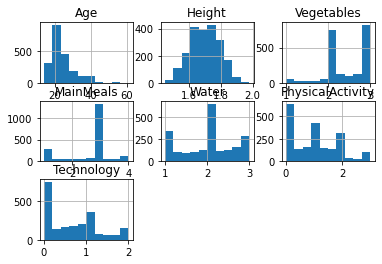

In [5]:
obesity.hist()
pyplot.show()

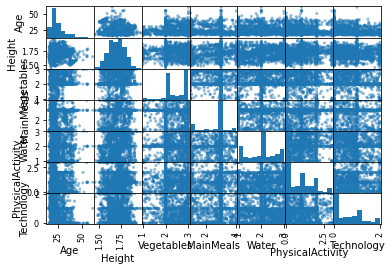

In [6]:
scatter_matrix(obesity)
pyplot.show()

In [7]:
y = obesity.pop('Obesity')

In [8]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: Obesity, Length: 2111, dtype: object

In [9]:
y.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [10]:
x = obesity.copy()

In [11]:
x

,Gender,Age,Height,HistoryOverweight,HighCaloric,Vegetables,MainMeals,Snacks,Water,Calories,PhysicalActivity,Technology,Alcohol
0,Female,21.000000,1.620000,yes,no,2.0,3.0,Sometimes,2.000000,no,0.000000,1.000000,no
1,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes
2,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently
3,Male,27.000000,1.800000,no,no,3.0,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently
4,Male,22.000000,1.780000,no,no,2.0,1.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,yes,yes,3.0,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes
2107,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes
2108,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes
2109,Female,24.361936,1.739450,yes,yes,3.0,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes


In [12]:
obesity['Gender'] = obesity['Gender'].map({'Female': 1, 'Male': 0})

In [13]:
obesity['HistoryOverweight'] = obesity['HistoryOverweight'].map({'yes': 1, 'no': 0})

In [14]:
obesity['HighCaloric'] = obesity['HighCaloric'].map({'yes': 1, 'no': 0})

In [15]:
obesity['Snacks'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: Snacks, dtype: int64

In [16]:
obesity['Snacks'] = obesity['Snacks'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [17]:
obesity['Calories'] = obesity['Calories'].map({'yes': 0, 'no': 1})

In [18]:
obesity['Alcohol'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: Alcohol, dtype: int64

In [19]:
obesity['Alcohol'] = obesity['Alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [21]:
x = obesity.copy()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1688, 13), (423, 13), (1688,), (423,))

In [23]:
x_train

,Gender,Age,Height,HistoryOverweight,HighCaloric,Vegetables,MainMeals,Snacks,Water,Calories,PhysicalActivity,Technology,Alcohol
1315,0,36.023972,1.670667,1,1,2.903545,1.508685,1,2.450069,1,1.454730,0.000000,1
2045,1,25.834018,1.624560,1,1,3.000000,3.000000,1,1.817860,1,0.011161,0.447224,1
1862,1,25.783865,1.655646,1,1,3.000000,3.000000,1,1.528258,1,0.015860,0.436068,1
1218,1,22.679935,1.608400,1,1,2.699282,1.000000,1,2.598632,1,0.292093,2.000000,1
708,1,19.071027,1.756865,0,1,1.694270,3.266644,1,1.095417,1,2.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,0,22.088059,1.803132,1,1,2.348745,3.000000,1,2.096751,1,0.544564,0.676880,1
2073,1,20.394082,1.747714,1,1,3.000000,3.000000,1,2.232601,1,0.554323,0.836151,1
1605,0,29.721964,1.918859,1,1,2.041376,3.000000,1,1.120213,1,1.055450,0.000000,1
132,1,19.000000,1.650000,1,1,3.000000,3.000000,2,3.000000,0,1.000000,2.000000,2


In [24]:
x_test

,Gender,Age,Height,HistoryOverweight,HighCaloric,Vegetables,MainMeals,Snacks,Water,Calories,PhysicalActivity,Technology,Alcohol
781,1,24.023972,1.599697,0,1,2.903545,3.000000,1,1.549931,1,0.000000,0.273882,1
1614,0,31.627962,1.762389,1,1,2.998441,3.000000,1,2.462916,1,0.554646,1.992190,1
241,0,22.000000,1.600000,0,1,3.000000,3.000000,1,2.000000,1,3.000000,0.000000,0
798,0,19.475540,1.857231,1,1,2.061952,4.000000,1,2.426465,1,2.000000,0.160138,1
742,0,18.000000,1.719827,1,1,1.202075,3.000000,1,1.927976,1,0.023574,1.747256,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0,23.000000,1.742500,1,1,2.393837,3.000000,1,2.014990,1,0.978815,0.413220,1
804,0,26.758516,1.801790,0,1,2.652958,2.488189,1,2.000000,1,2.000000,0.096614,0
429,0,26.000000,1.900000,1,1,2.000000,3.000000,2,1.000000,0,1.000000,0.000000,1
371,0,17.000000,1.620000,1,1,3.000000,1.000000,3,2.000000,0,1.000000,2.000000,1


In [25]:
y_train

1315         Obesity_Type_I
2045       Obesity_Type_III
1862       Obesity_Type_III
1218         Obesity_Type_I
708     Insufficient_Weight
               ...         
1461         Obesity_Type_I
2073       Obesity_Type_III
1605        Obesity_Type_II
132           Normal_Weight
298           Normal_Weight
Name: Obesity, Length: 1688, dtype: object

In [26]:
y_test

781      Overweight_Level_I
1614        Obesity_Type_II
241      Overweight_Level_I
798      Overweight_Level_I
742     Insufficient_Weight
               ...         
1460         Obesity_Type_I
804      Overweight_Level_I
429           Normal_Weight
371      Overweight_Level_I
1099    Overweight_Level_II
Name: Obesity, Length: 423, dtype: object

In [27]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions

array(['Overweight_Level_I', 'Obesity_Type_II', 'Normal_Weight',
       'Overweight_Level_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_III',
       'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_I',
       'Insufficient_Weight', 'Obesity_Type_I', 'Overweight_Level_II',
       'Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_II',
       'Obesity_Type_II', 'Overweight_Level_II', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_III', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_II', 'Obesity_Type_III',
       'Obesity_Type_I', 'Overweight_Level_I', 'Obesity_Type_II',
       'Obesity_Type_I', 'Obesity_Type_III', 'Normal_Weight',
       'Overweight_Level_II', 'Obesity_Type_III', 'Obesity_Type_III',
       'Overweight_Level_II', 'Obesity_Type_I', 'Overweight_Level_I',
       'Overweight_Level_II', 'Normal_Weight', 'Insuffic

In [30]:
accuracy_score(y_test, predictions)

0.8770685579196218

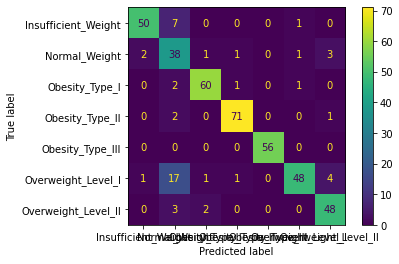

In [31]:
sklearn.metrics.plot_confusion_matrix(model, x_test, y_test)

In [32]:
predictions_train = model.predict(x_train)

In [36]:
importances = model.feature_importances_

In [37]:
sorted_indices = np.argsort(importances)[::-1]

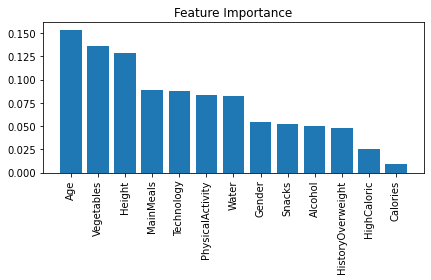

In [38]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()